# Classify code discriptions

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-03-19 13:35:39.665575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:

# Load dataset
df = pd.read_csv('analysis_dataset.csv')

# Feature extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['analysis_text']).toarray()

# Label encoding
labels = pd.get_dummies(df['task'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.1, random_state=42)



##  Model 1

In [24]:
# Define a simple neural network model for classification
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(labels.shape[1], activation='softmax')  # Output layer nodes equal to number of tasks
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/30
4/4 [==============================] - 1s 67ms/step - loss: 2.5564 - accuracy: 0.1287 - val_loss: 2.5364 - val_accuracy: 0.1667
Epoch 2/30
4/4 [==============================] - 0s 24ms/step - loss: 2.4387 - accuracy: 0.9109 - val_loss: 2.5013 - val_accuracy: 0.4167
Epoch 3/30
4/4 [==============================] - 0s 26ms/step - loss: 2.3016 - accuracy: 0.9604 - val_loss: 2.4416 - val_accuracy: 0.3333
Epoch 4/30
4/4 [==============================] - 0s 24ms/step - loss: 2.1069 - accuracy: 0.9802 - val_loss: 2.3320 - val_accuracy: 0.4167
Epoch 5/30
4/4 [==============================] - 0s 24ms/step - loss: 1.8535 - accuracy: 0.9901 - val_loss: 2.2057 - val_accuracy: 0.4167
Epoch 6/30
4/4 [==============================] - 0s 26ms/step - loss: 1.5327 - accuracy: 0.9901 - val_loss: 2.0126 - val_accuracy: 0.5000
Epoch 7/30
4/4 [==============================] - 0s 24ms/step - loss: 1.1720 - accuracy: 0.9901 - val_loss: 1.7942 - val_accuracy: 0.5833
Epoch 8/30
4/4 [===========

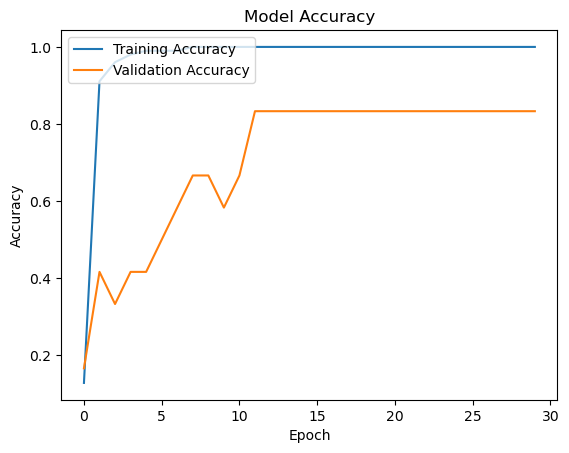

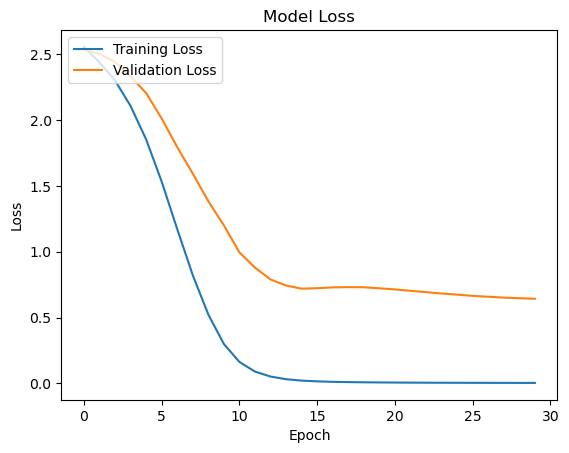

In [25]:
import matplotlib.pyplot as plt


# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Model 2
*   **Regularization**: Introduce L1 (lasso), L2 (ridge), or L1L2 (elastic net) regularization to the Dense layers. Regularization penalizes large weights, encouraging simpler models that may generalize better.
    
*   **Dropout**: Implement dropout layers to randomly set a fraction of input units to 0 at each step during training, which helps prevent overfitting by making the network's internal representations more robust.
    
*   **Reduce Model Complexity**: If the model is too large (has too many parameters relative to the number of observations), it might learn the training data too well. Consider reducing the number of units in Dense layers.
    
*   **Early Stopping**: Monitor the model's performance on a validation set and stop training when the validation loss starts to increase, even if the training loss continues to decrease. This strategy prevents overfitting by stopping the learning process before the model becomes too specialized to the training data.
    
*   **Data Augmentation**: Although more common in image processing, if applicable, generating new training samples through data augmentation can increase the diversity of the training data, helping the model generalize better.
    
*   **Batch Normalization**: Although not a direct method to combat overfitting, batch normalization can improve the training dynamics by normalizing the inputs of each layer. It can lead to better performance and stability, indirectly helping with overfitting by allowing the use of higher learning rates and less stringent initialization.

In [22]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust the learning rate based on the validation loss
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


# Define a neural network model with dropout and regularization for classification
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(labels.shape[1], activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with early stopping
history = model.fit(X_train, y_train, epochs=10000, validation_split=0.1, callbacks=[early_stopping,reduce_lr])


Epoch 1/10000
4/4 [==============================] - 1s 68ms/step - loss: 4.3041 - accuracy: 0.1485 - val_loss: 3.6102 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10000
4/4 [==============================] - 0s 24ms/step - loss: 3.3318 - accuracy: 0.2772 - val_loss: 3.5324 - val_accuracy: 0.0833 - lr: 0.0010
Epoch 3/10000
4/4 [==============================] - 0s 29ms/step - loss: 2.6831 - accuracy: 0.4158 - val_loss: 3.4764 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 4/10000
4/4 [==============================] - 0s 29ms/step - loss: 2.0530 - accuracy: 0.6337 - val_loss: 3.4335 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/10000
4/4 [==============================] - 0s 27ms/step - loss: 1.9259 - accuracy: 0.7525 - val_loss: 3.3971 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 6/10000
4/4 [==============================] - 0s 32ms/step - loss: 1.4997 - accuracy: 0.8614 - val_loss: 3.3675 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 7/10000
4/4 [==============================] - 0s 29ms/step 

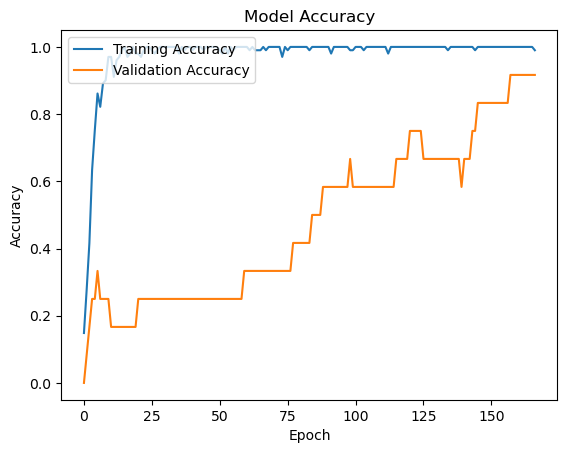

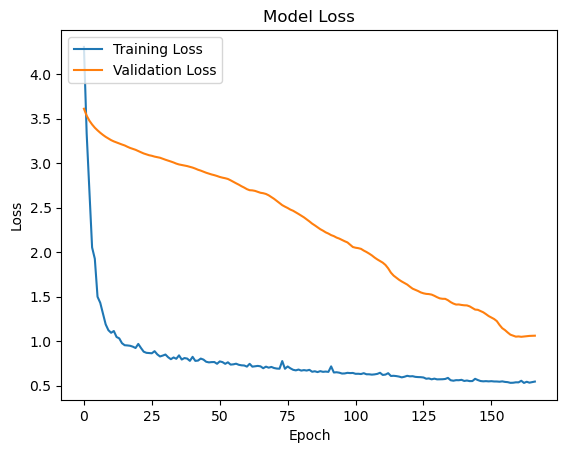

In [23]:
import matplotlib.pyplot as plt


# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Random forest

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('analysis_dataset.csv')

# Feature extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['analysis_text']).toarray()

# Label encoding
labels = pd.get_dummies(df['task'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.1, random_state=42)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the model
rf_model.fit(X_train, y_train.values.argmax(axis=1))

# Predictions
y_pred = rf_model.predict(X_test)

# Since y_pred are the indices of max values, convert y_test to the same format for comparison
y_test_indices = y_test.values.argmax(axis=1)

# Evaluate model
accuracy = accuracy_score(y_test_indices, y_pred)
print(f'Test Accuracy: {accuracy*100:.2f}%')


Test Accuracy: 92.31%


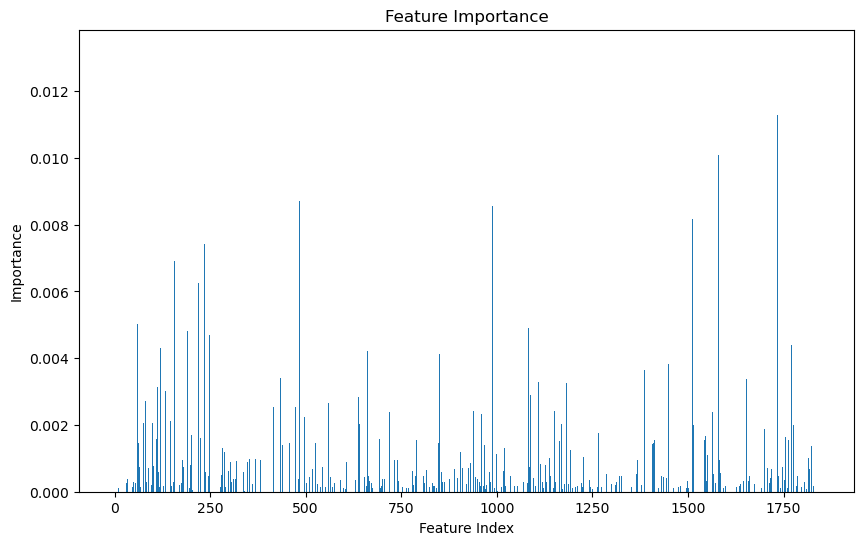

In [29]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


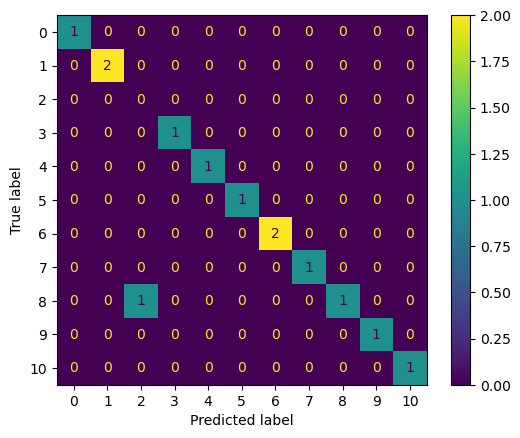

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_indices, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/avielstein/an

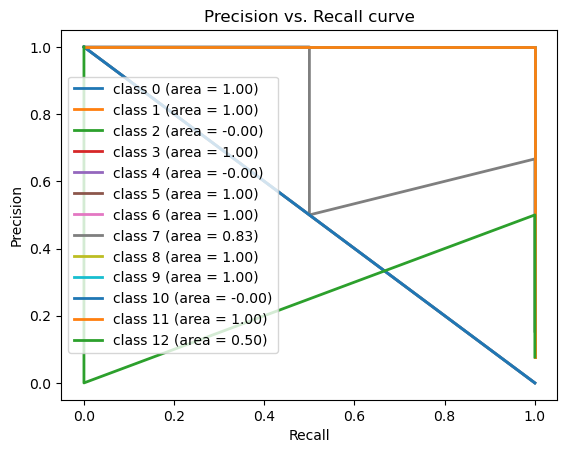

In [32]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_binarized = label_binarize(y_test_indices, classes=range(labels.shape[1]))

# Fit a OneVsRestClassifier and predict
one_vs_rest = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
one_vs_rest.fit(X_train, y_train)
y_score = one_vs_rest.predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(labels.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Plot the precision-recall curve for each class
for i in range(labels.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i} (area = {average_precision[i]:0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision vs. Recall curve")
plt.show()


### **ROC Curve and AUC (for each class)**

ROC curves and AUC scores are used to evaluate the model's performance across all classification thresholds.

/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/avielstein/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


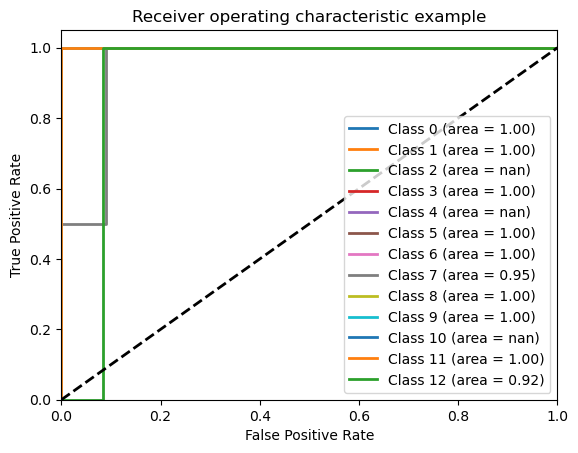

In [33]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
for i in range(labels.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
